In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Add column to geojson, price per sqm for each zipcode

In [62]:
# Create a dictionary "zipcode":price_sqm_meter
zip_pricesqm = pd.read_csv('./price_sqm_meters.csv')
print(zip_pricesqm.head())
zip_pricesqm_dict = zip_pricesqm.set_index('zip_code')['price-sqm'].to_dict()

# zip_pricesqm_dict.values()
# belgium_map_df['meanpsqm'] = (belgium_map_df['zip_code'].map(zip_pricesqm_dict))


with open('./datas/georef-belgium-postal-codes.geojson') as f:
    data = json.load(f)

# Iterate over the features
for feature in data['features']:
    # Add the new column to the properties
    _zip = int(feature['properties']['postcode'])
    if _zip in zip_pricesqm_dict:
        print(_zip, zip_pricesqm_dict.get(_zip))
        feature['properties']['mean_price_sqm'] = zip_pricesqm_dict.get(_zip)
    else:
        feature['properties']['mean_price_sqm'] = 0

# Write the modified GeoJSON file to disk
with open('./datas/georef-belgium-postal-codes-mpsqm.geojson', 'w') as f:
    json.dump(data, f)


   zip_code            Id          Price  Living area    price-sqm
0    1000.0  1.010501e+07  488871.389447   133.618736  3658.703882
1    1020.0  1.008000e+07  426584.615385   151.114754  2822.918370
2    1030.0  1.016293e+07  383445.103960   136.310502  2813.026858
3    1040.0  1.014834e+07  534708.333333   137.877778  3878.132807
4    1050.0  1.003056e+07  757222.451064   163.456522  4632.561876
3061 2762.0396600566573
9400 2156.807803647595
9960 1225.6198347107438
9400 2156.807803647595
4650 2763.5619242579323
4840 2332.3727272727274
4537 2113.882534775889
7850 2141.9345579793344
7971 1083.2072617246597
7501 2745.098039215686
7160 1471.234
7642 1772.2772277227723
7870 3783.3333333333335
7387 1403.5646085295991
1348 4028.671081677704
1470 2229.411021233569
2930 2818.7393511639425
2920 2937.1379897785346
2180 2149.377593360996
2660 2460.2692140686063
5060 1700.267780669221
5560 1323.046875
5374 nan
3500 3107.395960398901
3511 1914.2733937041828
3570 2509.117228286664
3920 2730.504345

### Test GeoPandas: display a map from geojson source file

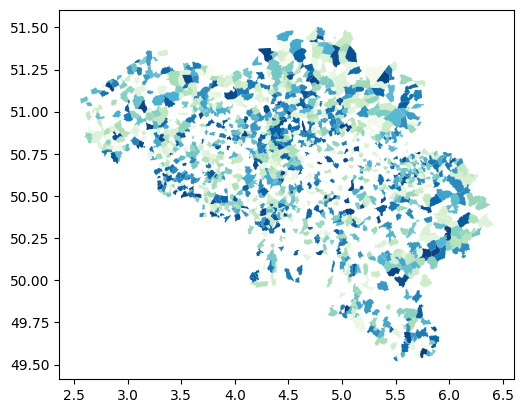

In [38]:
filename = "./datas/georef-belgium-postal-codes.geojson"
file = open(filename)
fig, ax = plt.subplots(1,1)

belgium_map_df = gpd.read_file(file)
# belgium_map_df.tail()

belgium_map_df.plot(ax=ax, cmap="GnBu", legend=True)
belgium_map_df.set_title = "Belgium"
plt.show()
plt.close()
# belgium_map_df.head()





###

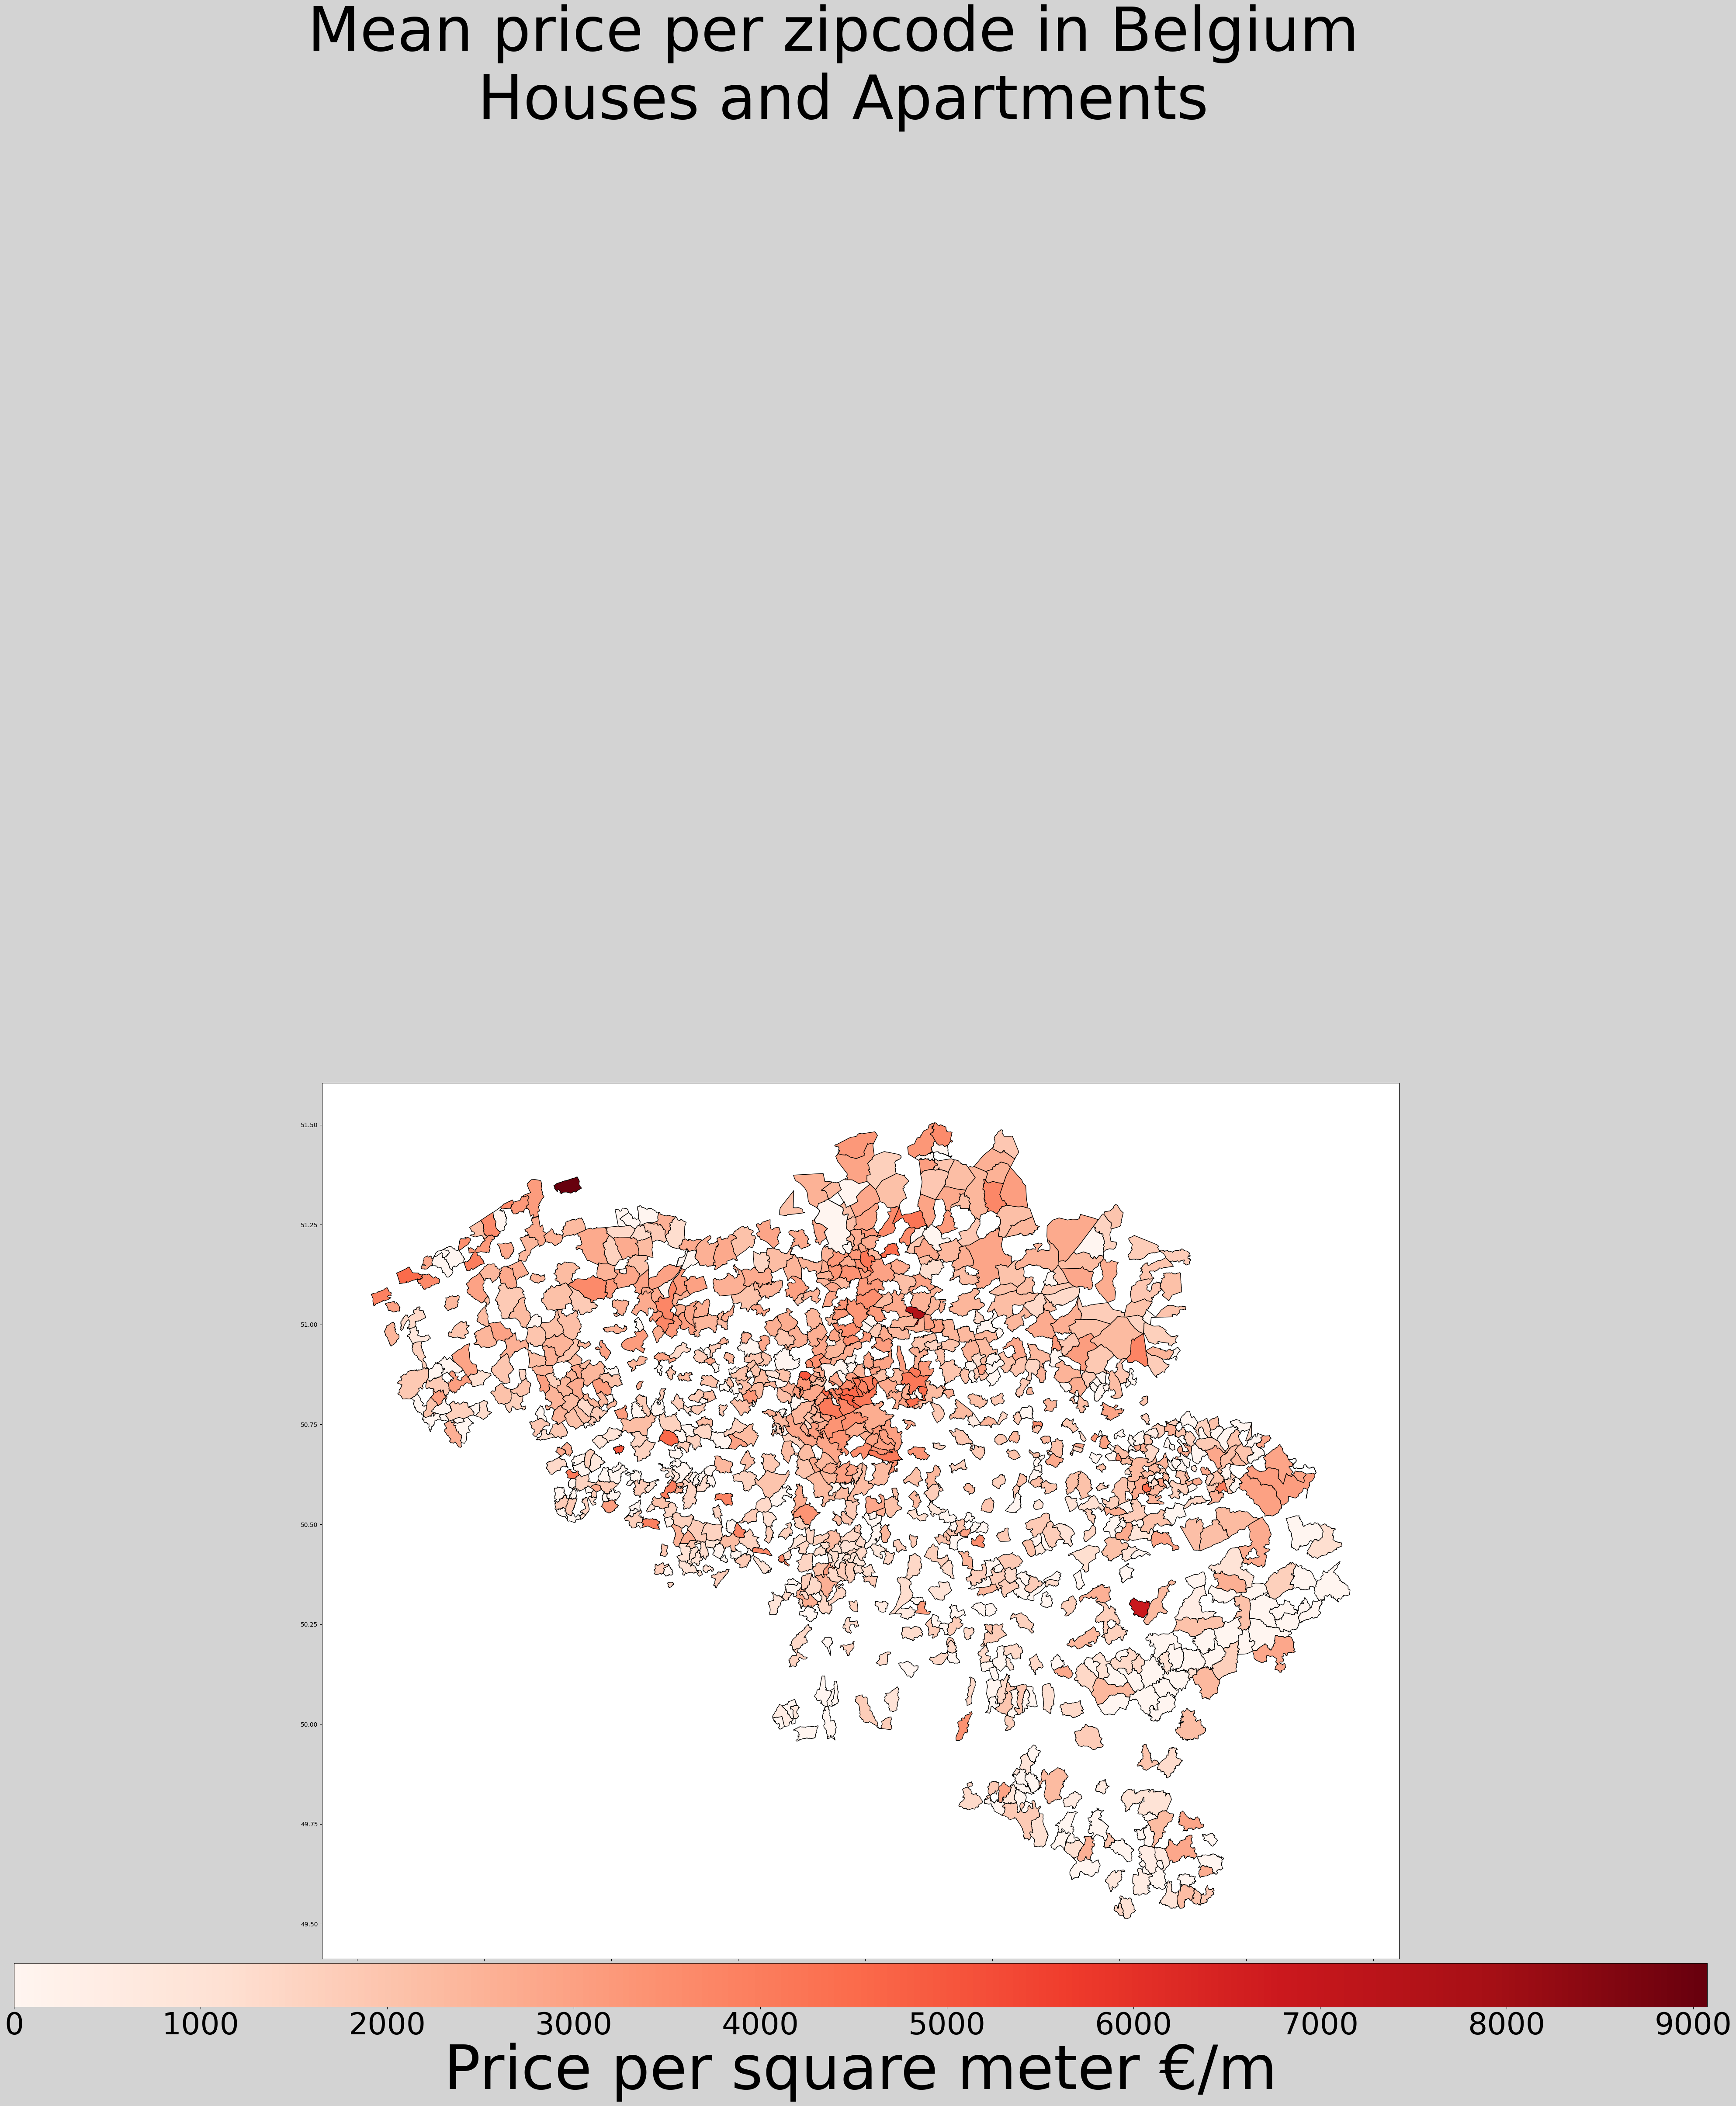

In [69]:

filename = "./datas/georef-belgium-postal-codes-mpsqm.geojson"
file = open(filename)
belgium_map_df = gpd.read_file(file)

fig, ax = plt.subplots(1,figsize=(80,80), facecolor='lightgray')
# color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
vmax = belgium_map_df['mean_price_sqm'].max()
mappable = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax, orientation="horizontal", shrink=0.5)

# Plot Map
belgium_map_df.plot(kind="geo",column='mean_price_sqm',
                    ax=ax,
                    cax=cax,
                    cmap="Reds",
                    edgecolor='black',
                    linewidth=1,
                    )
fig.set_size_inches(50,50)
fig.suptitle("Mean price per zipcode in Belgium\n Houses and Apartments", fontsize=100, color='Black', y=1.2)
cbar.set_label('Price per square meter €/m', fontsize=100)
cbar.set_ticks(np.arange(0, vmax, 1000))
cbar.ax.tick_params(labelsize=50)
# plt.tick_params(left = False, bottom = False)


plt.show()
# ax.set_visible(False)
